<a href="https://colab.research.google.com/github/leesh9069/growth_recording/blob/main/multiple_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run /content/drive/MyDrive/딥러닝/MathUtils.ipynb

In [ ]:
%run /content/drive/MyDrive/딥러닝/pulsar_model.ipynb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/딥러닝/faults.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [ ]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset = df.iloc[:, 27:]
dataset

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1936,0,0,0,0,0,0,1
1937,0,0,0,0,0,0,1
1938,0,0,0,0,0,0,1
1939,0,0,0,0,0,0,1


In [ ]:
dataset.value_counts()

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0       0          0         0       0          0      1               673
                                                1      0               402
                   1         0       0          0      0               391
        1          0         0       0          0      0               190
1       0          0         0       0          0      0               158
0       0          0         1       0          0      0                72
                             0       1          0      0                55
dtype: int64

In [ ]:
def multiple_classification_exec(epoch_count = 10, mb_size = 10, report = 1, train_ratio = 0.6, val_ratio = 0.2):
    multiple_classification_load_dataset()
    init_param()
    train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count, 
                                                                                mb_size, 
                                                                                report, 
                                                                                train_ratio,
                                                                                val_ratio)
    return train_metrics_mean_row, val_metrics_row, test_metrics

In [ ]:
def multiple_classification_load_dataset():
    with open('/content/drive/MyDrive/딥러닝/dataset/faults.csv') as csvfile:
    #with open('/content/drive/MyDrive/딥러닝/dataset/faults_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        rows = []
        for row in csvreader:
            rows.append(row)

    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 27, 7
    data = np.asarray(rows, dtype='float32')

In [ ]:
multiple_classification_load_dataset()

data.shape

(10, 34)

In [ ]:
init_param()

Initial weight Value : 
[[ 1.94189070e-03  5.60449644e-02  2.85906153e-02 -2.85889549e-02
   2.27112579e-02 -1.69460484e-02 -4.53974437e-03]
 [-7.47054487e-03  4.11499159e-02  1.39120684e-02  6.51513971e-03
  -5.14226916e-02 -6.57848866e-02 -2.28000513e-02]
 [-5.46282158e-03 -4.02301820e-02  9.60351877e-03 -3.54563578e-02
  -3.30960489e-02  1.01316327e-02  4.50323541e-03]
 [ 4.65109790e-02  4.21365269e-02 -1.32368372e-02 -2.25934225e-02
  -4.46347433e-02  1.51352808e-02  3.78266033e-02]
 [ 1.33245841e-03  2.30735885e-02  1.04248329e-02  5.42755006e-02
  -5.67013520e-02  1.73182049e-02 -4.30386004e-02]
 [-2.24875367e-03 -3.41072883e-02  1.72215658e-02  5.14865208e-02
  -4.85667843e-02 -9.45866085e-03 -5.47311467e-02]
 [ 4.84633693e-02 -8.29736852e-03  1.83673355e-02  6.60039376e-03
   6.10237681e-03  3.43742133e-02 -1.56536481e-03]
 [-1.56260765e-02  1.70789029e-02  5.70585869e-04  4.62492224e-02
  -1.67193092e-02  3.49472913e-02  5.90345513e-02]
 [ 3.36531899e-02 -1.56817018e-02 -1.462

In [ ]:
print("weight.shape : ", weight.shape)
print("bias.shape : ", bias.shape)

weight.shape :  (27, 7)
bias.shape :  (7,)


In [ ]:
mini_batch_step_count = arrange_data(mb_size = 6, train_ratio = 0.6, val_ratio = 0.2)
print("mini_batch_step_count : ", mini_batch_step_count)

mini_batch_step_count :  1


In [ ]:
train_x, train_y = get_train_data(mb_size = 3, n = 0)
test_x, test_y   = get_test_data()
val_x, val_y     = get_val_data()

In [ ]:
def run_train(x, y):
    loss = 0.001
    accuracy = [100, 100, 100, 100]

    return loss, accuracy

def run_test(x, y):
    loss = 0.001
    accuracy = [100, 100, 100, 100]

    return loss, accuracy
        

In [ ]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):

    mini_batch_step_count = arrange_data(mb_size,train_ratio, val_ratio)

    test_x, test_y = get_test_data()
    val_x,  val_y  = get_val_data()

    losses_mean_row = []
    val_loss_row    = []

    #losses_mean_row, accs_mean_row = [], []
    #val_loss_row, val_acc_row      = [], []
    
    for epoch in range(epoch_count):

        losses = []
        #accs = []

        for n in range(mini_batch_step_count):
            train_x, train_y  = get_train_data(mb_size, n)
           
            loss, _           = run_train(train_x,train_y)
               
            losses.append(loss)
            #accs.append(acc)

        val_loss, val_acc = run_test(val_x, val_y)
        val_loss_row.append(val_loss)
        #val_acc_row.append(val_acc)  

        if report > 0 and (epoch+1) % report == 0:
            
            print("Epoch {} : Train - Loss = {:.3f} / Val - Loss = {:.3f}, Acc = {:.3f}, Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3F}".\
                  format(epoch+1, np.mean(losses), val_loss, val_acc[0], val_acc[1], val_acc[2], val_acc[3]))
            
        losses_mean = np.mean(losses) 
        #accs_mean = np.mean(accs)

        losses_mean_row.append(losses_mean)  
        #accs_mean_row.append(accs_mean)   



    test_loss, test_acc = run_test(test_x, test_y)
    
    print("\n","=" * 50, 'Final Test', '=' * 50)
    print('\nTest Acc = {:.3f}, Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3F}'.\
          format(test_acc[0], test_acc[1], test_acc[2], test_acc[3]))
    print('\nLoss = {:.3f}'.format(test_loss))

    #return [losses_mean_row, accs_mean_row], [val_loss_row, val_acc_row], [test_loss , test_acc]
    return [losses_mean_row], [val_loss_row], [test_loss , test_acc]

In [ ]:
train_metrice_mean_row, val_metrice_row, test_metrics = train_and_test(epoch_count = 10, 
                                                                       mb_size = 6, 
                                                                       report = 1, 
                                                                       train_ratio = 0.6, 
                                                                       val_ratio = 0.2)

Epoch 1 : Train - Loss = 0.001 / Val - Loss = 0.001, Acc = 100.000, Precision = 100.000, Recall = 100.000, F1 = 100.000
Epoch 2 : Train - Loss = 0.001 / Val - Loss = 0.001, Acc = 100.000, Precision = 100.000, Recall = 100.000, F1 = 100.000
Epoch 3 : Train - Loss = 0.001 / Val - Loss = 0.001, Acc = 100.000, Precision = 100.000, Recall = 100.000, F1 = 100.000
Epoch 4 : Train - Loss = 0.001 / Val - Loss = 0.001, Acc = 100.000, Precision = 100.000, Recall = 100.000, F1 = 100.000
Epoch 5 : Train - Loss = 0.001 / Val - Loss = 0.001, Acc = 100.000, Precision = 100.000, Recall = 100.000, F1 = 100.000
Epoch 6 : Train - Loss = 0.001 / Val - Loss = 0.001, Acc = 100.000, Precision = 100.000, Recall = 100.000, F1 = 100.000
Epoch 7 : Train - Loss = 0.001 / Val - Loss = 0.001, Acc = 100.000, Precision = 100.000, Recall = 100.000, F1 = 100.000
Epoch 8 : Train - Loss = 0.001 / Val - Loss = 0.001, Acc = 100.000, Precision = 100.000, Recall = 100.000, F1 = 100.000
Epoch 9 : Train - Loss = 0.001 / Val - L

In [ ]:
y_hat, _ = forward_neuralnet(train_x)
print("y_hat : \n", y_hat)
print("y_hat.shape : \n", y_hat.shape)

y_hat : 
 [[  12796.09686853    1277.6710981    -1127.76273153  -17317.65317846
   -25974.09774428    9418.11282589   15851.24371544]
 [  83599.4537539     5842.72718167   -7422.00174515 -115747.77403362
  -163260.50660352   56040.01108156   93969.07293163]
 [  16492.34075983    1755.69991612   -1471.25644422  -22101.6726323
   -33795.4994862    12492.00676428   20984.08378998]]
y_hat.shape : 
 (3, 7)


In [ ]:
def softmax(x):
    max_elem = np.max(x, axis = 1)
    diff = (x.transpose() - max_elem).transpose()
    exp = np.exp(diff)
    sum_exp = np.sum(exp, axis = 1)
    probs = (exp.transpose() / sum_exp).transpose()

    return probs

In [ ]:
# 위에서 작성한 함수 동작 시키기 
probs = softmax(x = y_hat)
print("probs.shape : \n", probs.shape)
print("probs : \n", probs)

probs.shape : 
 (3, 7)
probs : 
 [[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
max_elem = np.max(y_hat, axis = 1)
print(max_elem)

[15851.24371544 93969.07293163 20984.08378998]


In [ ]:
diff = (y_hat.transpose() - max_elem).transpose()
print("diff : \n", diff)
print("diff.shape : \n", diff.shape)

diff : 
 [[  -3055.14684691  -14573.57261734  -16979.00644697  -33168.89689389
   -41825.34145972   -6433.13088955       0.        ]
 [ -10369.61917773  -88126.34574996 -101391.07467678 -209716.84696525
  -257229.57953514  -37929.06185007       0.        ]
 [  -4491.74303015  -19228.38387386  -22455.3402342   -43085.75642228
   -54779.58327618   -8492.0770257        0.        ]]
diff.shape : 
 (3, 7)


In [ ]:
exp = np.exp(diff)
print("exp : \n",exp)

exp : 
 [[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
def softmax_cross_entropy_with_logits(labels, y_hat):
    probs = softmax(x = y_hat)
    return - np.sum(labels * np.log(probs + 1.0e-10), axis = 1)

In [ ]:
entropy = softmax_cross_entropy_with_logits(labels=train_y, y_hat = y_hat)
print(entropy)
print(entropy.shape)

[-1.00000008e-10  2.30258509e+01 -1.00000008e-10]
(3,)


In [ ]:
def forward_postproc(output, y):
    entropy = softmax_cross_entropy_with_logits(labels = y, y_hat = output)
    loss    = np.mean(entropy)
    
    return loss, [y, output, entropy]

In [ ]:
# 상단의 함수 실행 
loss, _ = forward_postproc(output = y_hat, y = train_y)
print(loss)

7.6752836432468206


In [ ]:
def backprop_neuralnet(G_output, x):
    global weight, bias

    x_transpose = x.transpose()
    G_w = np.matmul(x_transpose, G_output)

    G_b = np.sum(G_output, axis = 0)

    weight -= LEARNING_RATE * G_w
    bias   -= LEARNING_RATE * G_b

In [ ]:
def softmax_cross_entropy_with_logits_derv(labels, y_hat):
    return softmax(y_hat) - labels

In [ ]:
def backprop_postproc(aux_pp):
    y, output, entropy = aux_pp
    g_loss_entropy   = 1.0 / np.prod(entropy.shape) 
    g_entropy_output = softmax_cross_entropy_with_logits_derv(labels = y, y_hat = output) 
    G_output = g_entropy_output * g_loss_entropy

    return G_output

In [ ]:
def eval_accuracy_numpy(output,y):

    est_yes = np.greater(output,0)
    ans_yes = np.greater(y, 0.5)

    est_no = np.logical_not(est_yes) 
    ans_no = np.logical_not(ans_yes)
  
    tp = np.sum(np.logical_and(est_yes, ans_yes))
    tn = np.sum(np.logical_and(est_no, ans_no))
    fp = np.sum(np.logical_and(ans_no, est_yes))
    fn = np.sum(np.logical_and(ans_yes, est_no))

    accuracy = safe_div(tp+tn,tp+fp+fn+tn)
    precision = safe_div(tp,tp+fp)
    recall = safe_div(tp,tp+fn)
    f1 = 2 * safe_div(recall*precision,recall+precision)
    
    return [accuracy, precision, recall, f1]

In [ ]:
def safe_div(p, q):
    p, q = float(p), float(q)
    if np.abs(q) < 1.0e-20:
        return np.sign(p)
    return p / q

In [ ]:
def run_train(x, y):
# 순전파 ▼
    y_hat, aux_nn_x           = forward_neuralnet(x)
    loss, aux_pp_y_output_CEE = forward_postproc(y_hat, y)

    accuracy = eval_accuracy_numpy(y_hat, y)
    
# 역전파 ▼   
    # 손실함수의 미분 
    G_output = backprop_postproc(aux_pp_y_output_CEE)
    # 경사 하강법(w,b값 갱신)
    backprop_neuralnet(G_output, aux_nn_x)
    
    return loss, accuracy

def run_test(x, y):
    y_hat, _ = forward_neuralnet(x)
    loss,  _ = forward_postproc(y_hat, y)
    accuracy = eval_accuracy_numpy(y_hat, y)
    return loss, accuracy

In [ ]:
train_metrics_mean_row, val_metrics_row, test_metrics = multiple_classification_exec(epoch_count = 100, 
                                                                                     mb_size = 32, 
                                                                                     report = 1, 
                                                                                     train_ratio = 0.6, 
                                                                                     val_ratio = 0.2)

Initial weight Value : 
[[-0.02378317 -0.00388934  0.00227227 -0.04071272 -0.00764651  0.03388363
  -0.03294485]
 [ 0.00288256 -0.00310509 -0.04246666  0.01034729  0.01904967  0.02312444
   0.00476029]
 [ 0.04739337 -0.01057573  0.01237782 -0.00423357  0.00990216 -0.01349907
   0.01783212]
 [ 0.07247497 -0.02177499 -0.02275379 -0.02184496  0.02899817 -0.02478963
   0.02934022]
 [-0.03097266  0.03199648 -0.02573648  0.00567379  0.00553371 -0.01688723
  -0.04830941]
 [ 0.02800126  0.06166306  0.06454844 -0.03980119 -0.02765595  0.00788691
  -0.01439721]
 [-0.04135908 -0.03619616  0.02537294 -0.0186903  -0.06969465  0.01700883
  -0.01764884]
 [ 0.03156705 -0.01643801 -0.02743564 -0.00676504 -0.00012169  0.02485144
  -0.05044796]
 [-0.0092692  -0.01180442  0.00242642  0.01079428 -0.04145803  0.0062439
   0.03496329]
 [ 0.00751133 -0.01933279 -0.07869061  0.00089516  0.03641672 -0.00636835
  -0.01224785]
 [ 0.00293284  0.00554217 -0.01404476 -0.00292447 -0.01754857  0.0554777
  -0.02130364]

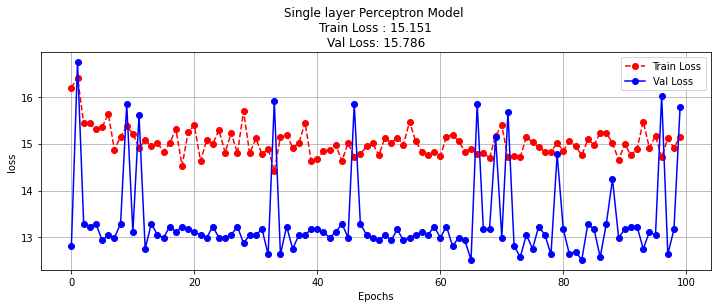

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.plot(train_metrics_mean_row[0], '--o', color = 'red', label = 'Train Loss')
plt.plot(val_metrics_row[0], '-o', color = 'blue', label = 'Val Loss')

plt.title('Single layer Perceptron Model \nTrain Loss : {:.3f}\nVal Loss: {:.3f}'.format(train_metrics_mean_row[0][-1] , val_metrics_row[0][-1]))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.show()